What percentage of your customers leave the platform each month? 75
What percentage growth in new customers do you experience monthly? 109
What percentage of your vendors or developers leave the platform each month? 0
What percentage growth in new vendors or developers do you experience monthly? 10
How attractive do you believe your platform is to new consumers when the platform is fully developed? (1-10) 9
How attractive do you believe your platform is to developers when there is a large consumer base? (1-10) 10
How sensitive are consumers to changes in the number of available products or services? (1-5) 3
How sensitive are developers to changes in the consumer base size? (1-5) 3
At what size do you expect the attractiveness to new consumers to stop increasing significantly? (1-5) 5
At what size do you expect the attractiveness to new developers to stop increasing significantly? (1-5) 5
How many consumers are currently using your platform? 10000
How many developers or vendors are curr

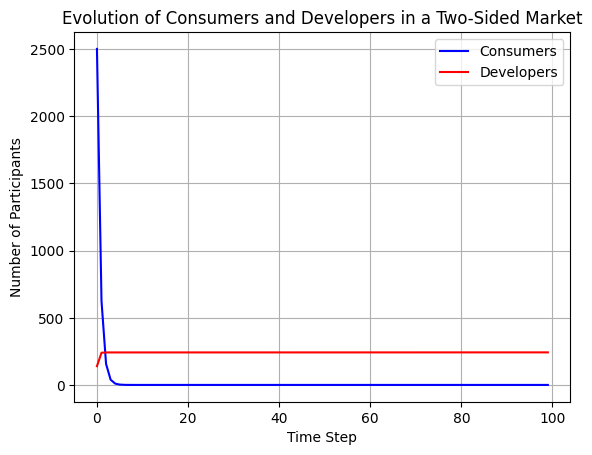

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# User inputs for the model parameters
consumerAttritionRate = float(input("What percentage of your customers leave the platform each month? ")) / 100
consumerGrowthRate = float(input("What percentage growth in new customers do you experience monthly? ")) / 100
developerAttritionRate = float(input("What percentage of your vendors or developers leave the platform each month? ")) / 100
developerGrowthRate = float(input("What percentage growth in new vendors or developers do you experience monthly? ")) / 100
consumerAffinity = int(input("How attractive do you believe your platform is to new consumers when the platform is fully developed? (1-10) "))
developerAffinity = int(input("How attractive do you believe your platform is to developers when there is a large consumer base? (1-10) "))
consumerGrowthSensitivity = int(input("How sensitive are consumers to changes in the number of available products or services? (1-5) "))
developerGrowthSensitivity = int(input("How sensitive are developers to changes in the consumer base size? (1-5) "))
consumerSaturation = int(input("At what size do you expect the attractiveness to new consumers to stop increasing significantly? (1-5) "))
developerSaturation = int(input("At what size do you expect the attractiveness to new developers to stop increasing significantly? (1-5) "))
initialConsumers = int(input("How many consumers are currently using your platform? "))
initialDevelopers = int(input("How many developers or vendors are currently providing products or services on your platform? "))
days = int(input("How long do you want the simulation to run (in days)? "))

# Parameter arrays (values in the same index as the user input ratings)
gu_max_values = [0, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
gm_max_values = [0, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
alpha_u_values = [0.001, 0.005, 0.01, 0.015, 0.02]
alpha_m_values = [0.001, 0.005, 0.01, 0.015, 0.02]
beta_u_values = [100, 250, 500, 750, 1000]
beta_m_values = [100, 250, 500, 750, 1000]

# Model parameters based on inputs
gu_max = gu_max_values[consumerAffinity - 1]
gm_max = gm_max_values[developerAffinity - 1]
alpha_u = alpha_u_values[consumerGrowthSensitivity - 1]
alpha_m = alpha_m_values[developerGrowthSensitivity - 1]
beta_u = beta_u_values[consumerSaturation - 1]
beta_m = beta_m_values[developerSaturation - 1]

# Initial conditions
nu = initialConsumers
nm = initialDevelopers
timesteps = days

# Arrays to store the evolution of the market over time
nu_t = np.zeros(timesteps)
nm_t = np.zeros(timesteps)

# Simulation loop
for t in range(timesteps):
    gu = gu_max / (1 + np.exp(-alpha_u * (nm - beta_u)))
    gm = gm_max / (1 + np.exp(-alpha_m * (nu - beta_m)))

    nu_new = (1 - consumerAttritionRate) * nu + consumerGrowthRate * gu
    nm_new = (1 - developerAttritionRate) * nm + developerGrowthRate * gm

    nu_t[t] = nu_new
    nm_t[t] = nm_new

    nu = nu_new
    nm = nm_new

# Plotting the results
plt.figure()
plt.plot(nu_t, 'b', label='Consumers')
plt.plot(nm_t, 'r', label='Developers')
plt.title('Evolution of Consumers and Developers in a Two-Sided Market')
plt.xlabel('Days')
plt.ylabel('Number of Participants')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
!pip install dash


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 45.4 MB/s eta 0:00:00


In [23]:
import dash
from dash import dcc, html, Input, Output, State
import numpy as np
import plotly.graph_objs as go

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    html.Div([
        html.H1("Two-Sided Market Model"),
        html.Div([
            html.Label("What percentage of your customers leave the platform each day?"),
            dcc.Slider(id='consumer-attrition-rate', min=0, max=100, step=0.1, value=5),
            html.Div(id='consumer-attrition-rate-display', style={'margin-top': 10}),
            html.Div([
                html.Label("Max", style={'margin-right': '10px'}),
                dcc.Input(id='max-consumer-attrition-rate', type='number', value=100, style={'width': '80px'}),
            ], style={'display': 'flex', 'justify-content': 'flex-end', 'margin-bottom': '20px'}),

            html.Label("What percentage growth in new customers do you experience each day?"),
            dcc.Slider(id='consumer-growth-rate', min=0, max=100, step=0.1, value=10),
            html.Div(id='consumer-growth-rate-display', style={'margin-top': 10}),
            html.Div([
                html.Label("Max", style={'margin-right': '10px'}),
                dcc.Input(id='max-consumer-growth-rate', type='number', value=100, style={'width': '80px'}),
            ], style={'display': 'flex', 'justify-content': 'flex-end', 'margin-bottom': '20px'}),

            html.Label("What percentage of your providers leave the platform each day?"),
            dcc.Slider(id='provider-attrition-rate', min=0, max=100, step=0.1, value=3),
            html.Div(id='provider-attrition-rate-display', style={'margin-top': 10}),
            html.Div([
                html.Label("Max", style={'margin-right': '10px'}),
                dcc.Input(id='max-provider-attrition-rate', type='number', value=100, style={'width': '80px'}),
            ], style={'display': 'flex', 'justify-content': 'flex-end', 'margin-bottom': '20px'}),

            html.Label("What percentage growth in new providers do you experience each day?"),
            dcc.Slider(id='provider-growth-rate', min=0, max=100, step=0.1, value=7),
            html.Div(id='provider-growth-rate-display', style={'margin-top': 10}),
            html.Div([
                html.Label("Max", style={'margin-right': '10px'}),
                dcc.Input(id='max-provider-growth-rate', type='number', value=100, style={'width': '80px'}),
            ], style={'display': 'flex', 'justify-content': 'flex-end', 'margin-bottom': '20px'}),

            html.Label("How attractive do you believe your platform is to new consumers when the platform is fully developed? (1-10)"),
            dcc.Slider(id='consumer-affinity', min=1, max=10, step=1, value=9,
                       marks={i: str(i) for i in range(1, 11)},
                       tooltip={"placement": "bottom", "always_visible": False}),
            html.Div(id='consumer-affinity-display', style={'margin-top': 10}),

            html.Label("How attractive do you believe your platform is to providers when there is a large consumer base? (1-10)"),
            dcc.Slider(id='provider-affinity', min=1, max=10, step=1, value=10,
                       marks={i: str(i) for i in range(1, 11)},
                       tooltip={"placement": "bottom", "always_visible": False}),
            html.Div(id='provider-affinity-display', style={'margin-top': 10}),

            html.Label("How sensitive are consumers to changes in the number of available products or services? (1-5)"),
            dcc.Slider(id='consumer-growth-sensitivity', min=1, max=5, step=1, value=2,
                       marks={i: str(i) for i in range(1, 6)},
                       tooltip={"placement": "bottom", "always_visible": False}),
            html.Div(id='consumer-growth-sensitivity-display', style={'margin-top': 10}),

            html.Label("How sensitive are providers to changes in the consumer base size? (1-5)"),
            dcc.Slider(id='provider-growth-sensitivity', min=1, max=5, step=1, value=3,
                       marks={i: str(i) for i in range(1, 6)},
                       tooltip={"placement": "bottom", "always_visible": False}),
            html.Div(id='provider-growth-sensitivity-display', style={'margin-top': 10}),

            html.Label("At what size do you expect the attractiveness to new consumers to stop increasing significantly? (1-5)"),
            dcc.Slider(id='consumer-saturation', min=1, max=5, step=1, value=4,
                       marks={i: str(i) for i in range(1, 6)},
                       tooltip={"placement": "bottom", "always_visible": False}),
            html.Div(id='consumer-saturation-display', style={'margin-top': 10}),

            html.Label("At what size do you expect the attractiveness to new providers to stop increasing significantly? (1-5)"),
            dcc.Slider(id='provider-saturation', min=1, max=5, step=1, value=5,
                       marks={i: str(i) for i in range(1, 6)},
                       tooltip={"placement": "bottom", "always_visible": False}),
            html.Div(id='provider-saturation-display', style={'margin-top': 10}),

            html.Label("How many consumers are currently using your platform?"),
            dcc.Slider(id='initial-consumers', min=0, max=1000, step=1, value=200),
            html.Div(id='initial-consumers-display', style={'margin-top': 10}),
            html.Div([
                html.Label("Max", style={'margin-right': '10px'}),
                dcc.Input(id='max-initial-consumers', type='number', value=1000, style={'width': '80px'}),
            ], style={'display': 'flex', 'justify-content': 'flex-end', 'margin-bottom': '20px'}),

            html.Label("How many providers are currently providing products or services on your platform?"),
            dcc.Slider(id='initial-providers', min=0, max=500, step=1, value=30),
            html.Div(id='initial-providers-display', style={'margin-top': 10}),
            html.Div([
                html.Label("Max", style={'margin-right': '10px'}),
                dcc.Input(id='max-initial-providers', type='number', value=500, style={'width': '80px'}),
            ], style={'display': 'flex', 'justify-content': 'flex-end', 'margin-bottom': '20px'}),

            html.Label("How long do you want the simulation to run (in days)?"),
            dcc.Slider(id='days', min=1, max=365, step=1, value=200),
            html.Div(id='days-display', style={'margin-top': 10}),
            html.Div([
                html.Label("Max", style={'margin-right': '10px'}),
                dcc.Input(id='max-days', type='number', value=365, style={'width': '80px'}),
            ], style={'display': 'flex', 'justify-content': 'flex-end', 'margin-bottom': '20px'}),
        ], style={'height': '80vh', 'overflowY': 'scroll', 'padding': '20px', 'border': '1px solid #ccc'})
    ], style={'width': '40%', 'float': 'left'}),

    html.Div([
        dcc.Graph(id='market-model-graph')
    ], style={'width': '55%', 'float': 'right'}),
])

@app.callback(
    Output('consumer-attrition-rate', 'min'),
    Output('consumer-attrition-rate', 'max'),
    Input('max-consumer-attrition-rate', 'value')
)
def update_consumer_attrition_rate(max_value):
    return 0, max_value

@app.callback(
    Output('consumer-growth-rate', 'min'),
    Output('consumer-growth-rate', 'max'),
    Input('max-consumer-growth-rate', 'value')
)
def update_consumer_growth_rate(max_value):
    return 0, max_value

@app.callback(
    Output('provider-attrition-rate', 'min'),
    Output('provider-attrition-rate', 'max'),
    Input('max-provider-attrition-rate', 'value')
)
def update_provider_attrition_rate(max_value):
    return 0, max_value

@app.callback(
    Output('provider-growth-rate', 'min'),
    Output('provider-growth-rate', 'max'),
    Input('max-provider-growth-rate', 'value')
)
def update_provider_growth_rate(max_value):
    return 0, max_value

@app.callback(
    Output('initial-consumers', 'min'),
    Output('initial-consumers', 'max'),
    Input('max-initial-consumers', 'value')
)
def update_initial_consumers(max_value):
    return 0, max_value

@app.callback(
    Output('initial-providers', 'min'),
    Output('initial-providers', 'max'),
    Input('max-initial-providers', 'value')
)
def update_initial_providers(max_value):
    return 0, max_value

@app.callback(
    Output('days', 'min'),
    Output('days', 'max'),
    Input('max-days', 'value')
)
def update_days(max_value):
    return 1, max_value

@app.callback(
    Output('consumer-attrition-rate-display', 'children'),
    Input('consumer-attrition-rate', 'value')
)
def display_consumer_attrition_rate(value):
    return f"Value: {round(value)}%"

@app.callback(
    Output('consumer-growth-rate-display', 'children'),
    Input('consumer-growth-rate', 'value')
)
def display_consumer_growth_rate(value):
    return f"Value: {round(value)}%"

@app.callback(
    Output('provider-attrition-rate-display', 'children'),
    Input('provider-attrition-rate', 'value')
)
def display_provider_attrition_rate(value):
    return f"Value: {round(value)}%"

@app.callback(
    Output('provider-growth-rate-display', 'children'),
    Input('provider-growth-rate', 'value')
)
def display_provider_growth_rate(value):
    return f"Value: {round(value)}%"

@app.callback(
    Output('consumer-affinity-display', 'children'),
    Input('consumer-affinity', 'value')
)
def display_consumer_affinity(value):
    return f"Value: {value}"

@app.callback(
    Output('provider-affinity-display', 'children'),
    Input('provider-affinity', 'value')
)
def display_provider_affinity(value):
    return f"Value: {value}"

@app.callback(
    Output('consumer-growth-sensitivity-display', 'children'),
    Input('consumer-growth-sensitivity', 'value')
)
def display_consumer_growth_sensitivity(value):
    return f"Value: {value}"

@app.callback(
    Output('provider-growth-sensitivity-display', 'children'),
    Input('provider-growth-sensitivity', 'value')
)
def display_provider_growth_sensitivity(value):
    return f"Value: {value}"

@app.callback(
    Output('consumer-saturation-display', 'children'),
    Input('consumer-saturation', 'value')
)
def display_consumer_saturation(value):
    return f"Value: {value}"

@app.callback(
    Output('provider-saturation-display', 'children'),
    Input('provider-saturation', 'value')
)
def display_provider_saturation(value):
    return f"Value: {value}"

@app.callback(
    Output('initial-consumers-display', 'children'),
    Input('initial-consumers', 'value')
)
def display_initial_consumers(value):
    return f"Value: {value}"

@app.callback(
    Output('initial-providers-display', 'children'),
    Input('initial-providers', 'value')
)
def display_initial_providers(value):
    return f"Value: {value}"

@app.callback(
    Output('days-display', 'children'),
    Input('days', 'value')
)
def display_days(value):
    return f"Value: {value} days"

@app.callback(
    Output('market-model-graph', 'figure'),
    [Input('consumer-attrition-rate', 'value'),
     Input('consumer-growth-rate', 'value'),
     Input('provider-attrition-rate', 'value'),
     Input('provider-growth-rate', 'value'),
     Input('consumer-affinity', 'value'),
     Input('provider-affinity', 'value'),
     Input('consumer-growth-sensitivity', 'value'),
     Input('provider-growth-sensitivity', 'value'),
     Input('consumer-saturation', 'value'),
     Input('provider-saturation', 'value'),
     Input('initial-consumers', 'value'),
     Input('initial-providers', 'value'),
     Input('days', 'value')]
)
def update_graph(consumerAttritionRate, consumerGrowthRate, providerAttritionRate, providerGrowthRate,
                 consumerAffinity, providerAffinity, consumerGrowthSensitivity, providerGrowthSensitivity,
                 consumerSaturation, providerSaturation, initialConsumers, initialProviders, days):
    # Parameter arrays
    gu_max_values = [0, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
    gm_max_values = [0, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
    alpha_u_values = [0.001, 0.005, 0.01, 0.015, 0.02]
    alpha_m_values = [0.001, 0.005, 0.01, 0.015, 0.02]
    beta_u_values = [100, 250, 500, 750, 1000]
    beta_m_values = [100, 250, 500, 750, 1000]

    # Model parameters
    gu_max = gu_max_values[consumerAffinity - 1]
    gm_max = gm_max_values[providerAffinity - 1]
    alpha_u = alpha_u_values[consumerGrowthSensitivity - 1]
    alpha_m = alpha_m_values[providerGrowthSensitivity - 1]
    beta_u = beta_u_values[consumerSaturation - 1]
    beta_m = beta_m_values[providerSaturation - 1]

    # Initial conditions
    nu = initialConsumers
    nm = initialProviders
    timesteps = days

    # Arrays to store the evolution of the market over time
    nu_t = np.zeros(timesteps)
    nm_t = np.zeros(timesteps)

    # Simulation loop
    for t in range(timesteps):
        gu = gu_max / (1 + np.exp(-alpha_u * (nm - beta_u)))
        gm = gm_max / (1 + np.exp(-alpha_m * (nu - beta_m)))

        nu_new = (1 - consumerAttritionRate / 100) * nu + (consumerGrowthRate / 100) * gu
        nm_new = (1 - providerAttritionRate / 100) * nm + (providerGrowthRate / 100) * gm

        nu_t[t] = nu_new
        nm_t[t] = nm_new

        nu = nu_new
        nm = nm_new

    # Plotting the results
    figure = {
        'data': [
            go.Scatter(x=np.arange(timesteps), y=nu_t, mode='lines', name='Consumers'),
            go.Scatter(x=np.arange(timesteps), y=nm_t, mode='lines', name='Providers')
        ],
        'layout': go.Layout(
            title='Evolution of Consumers and Providers in a Two-Sided Market',
            xaxis={'title': 'Days'},
            yaxis={'title': 'Number of Participants'},
            legend={'x': 0, 'y': 1},
            hovermode='closest'
        )
    }
    return figure

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>